# Preprocessing and splitting the breast cancer dataset

## Load the data and remove duplicates

In [1]:
import json
from pathlib import Path

import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import KFold

In [2]:
data = pd.read_csv('pharyngitis.csv')
ordered_cols = list(set(data.columns) - set(['radt'])) + ['radt']
data = data[ordered_cols]

In [3]:
data

,temperature,headache,conjunctivitis,number,diarrhea,tonsillarswelling,nauseavomit,tender,swollenadp,scarlet,abdopain,age_y,cough,sudden,pain,rhinorrhea,petechiae,erythema,exudate,radt
0,37.0,0.0,0.0,2000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0
1,38.0,0.0,0.0,2001,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.7,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1
2,37.0,0.0,1.0,2002,0.0,1.0,0.0,1.0,2.0,0.0,0.0,5.6,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1
3,40.8,0.0,0.0,2003,0.0,1.0,0.0,1.0,2.0,0.0,0.0,6.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1
4,40.0,1.0,0.0,2004,0.0,1.0,0.0,0.0,2.0,0.0,0.0,5.2,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,39.0,1.0,0.0,3283,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4.7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
672,38.5,0.0,0.0,3284,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.3,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0
673,39.0,0.0,0.0,3285,1.0,1.0,1.0,0.0,1.0,0.0,1.0,4.6,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1
674,39.0,0.0,0.0,3286,1.0,1.0,0.0,NaN,2.0,NaN,0.0,3.4,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0


In [4]:
#missing_val = [-7, -8, -9]
#data = data.replace(missing_val, np.nan)

In [5]:
data.isnull().sum()

temperature           3
headache             14
conjunctivitis        5
number                0
diarrhea             13
tonsillarswelling    18
nauseavomit          12
tender               28
swollenadp            4
scarlet              10
abdopain              9
age_y                 0
cough                12
sudden                7
pain                 32
rhinorrhea            3
petechiae            42
erythema              4
exudate              10
radt                  0
dtype: int64

Features we could encode in a special way: 

- 'NumTrades60Ever2DerogPubRec' and other integer features: some have few enough distinct categories that we could treat them as ordinal, perhaps. 

- Percent and Fraction features do need to be constrained between 0 and 100. 


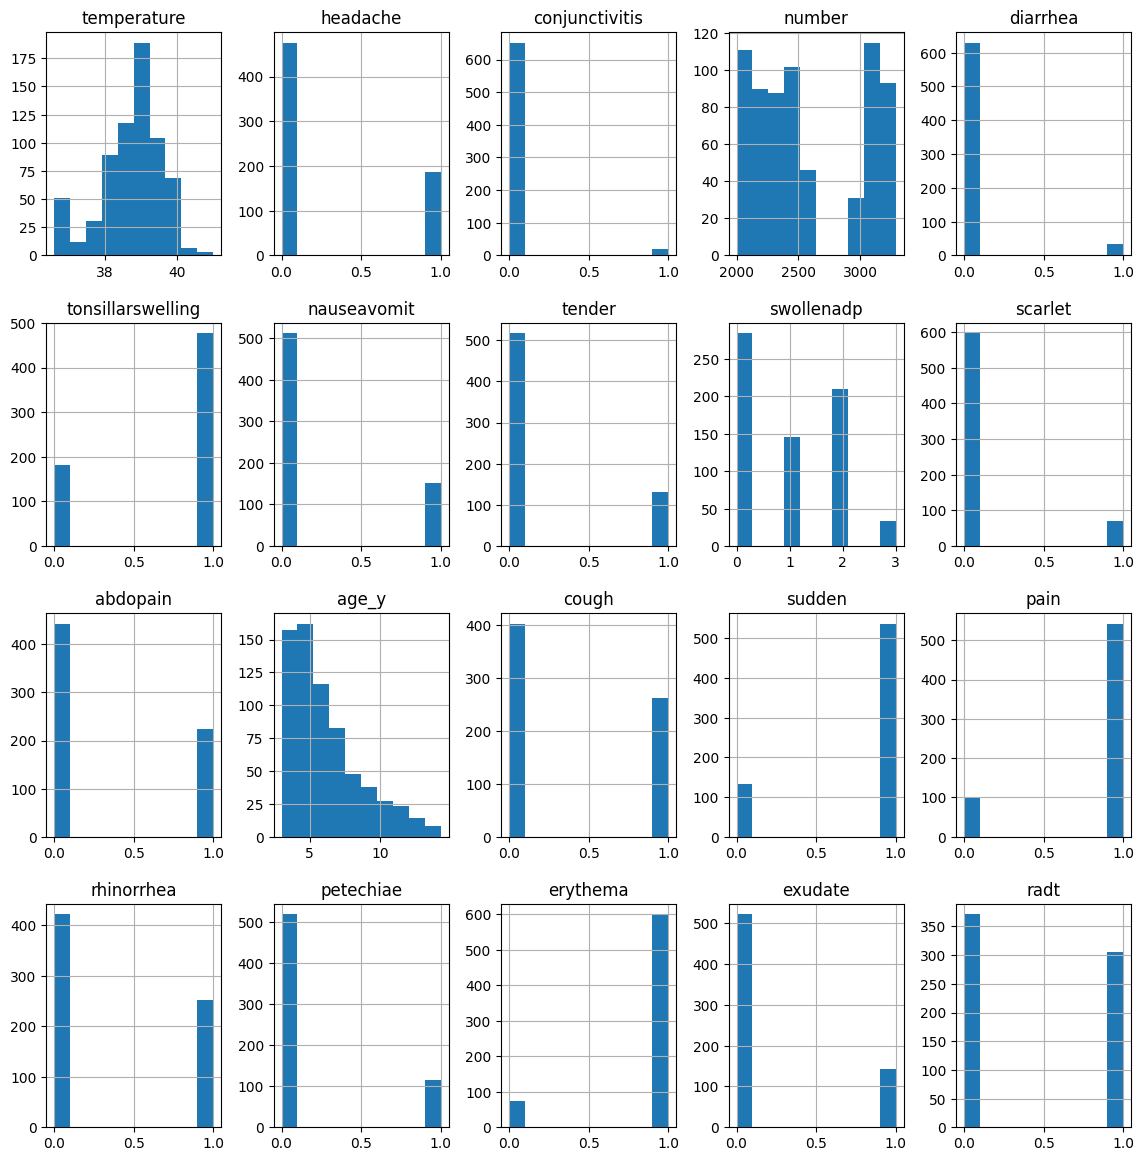

In [6]:
data.hist(figsize=(14, 18), layout=(5, 5));

### Create training, validation and holdout sets

In [7]:
outdir = Path('.')
outdir.mkdir(exist_ok=True)

n_splits = 10
n_folds = 5
idx = np.arange(len(data))

kf_splits = KFold(n_splits=n_splits, random_state=1896, shuffle=True)

for holdout_num, out_split in enumerate(kf_splits.split(idx)):
    idx_train = idx[out_split[0]]
    idx_test = idx[out_split[1]]
    devel_fold = data.iloc[idx_train, ]
    test_fold = data.iloc[idx_test, ]

    test_fold.to_csv(outdir / f'holdout_{holdout_num}.csv', index=False)

    kf_folds = KFold(n_splits=n_folds, random_state=165782 * holdout_num, shuffle=True)
    idx_folds = np.arange(len(devel_fold))
    for fold_num, idx_fold_split in enumerate(kf_folds.split(idx_folds)):
        train_fold = devel_fold.iloc[idx_fold_split[0]]
        val_fold = devel_fold.iloc[idx_fold_split[1]]
        train_fold.to_csv(outdir / f'devel_{holdout_num}_train_{fold_num}.csv', index=False)
        val_fold.to_csv(outdir / f'devel_{holdout_num}_val_{fold_num}.csv', index=False)